<huge>
<center>

# Nubes de puntos y mapas de calor - Matplotlib

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('C:/Users/jorge/Desktop/Linkedin DATASCIENCE/CURSO/data/2008.csv')
df.dropna(inplace=True, subset=["ArrDelay","DepDelay","Distance","AirTime"])
#ajustar tamaño del grafico.
sns.set(rc={'figure.figsize':(15,10)})

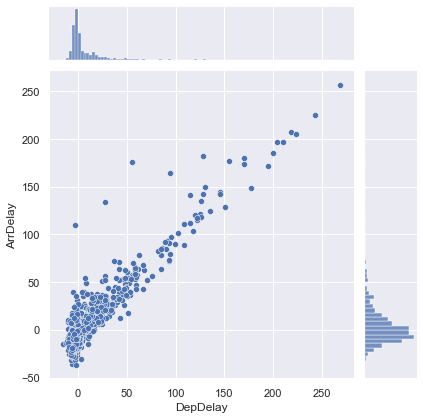

In [3]:
df2 = df[df["Origin"].isin(["ATL","HOU","IND"])].sample(frac=1).head(1000)

#instruccion para la nube de puntos
#permite ver si los datos estan muy correlacionados o no, en este caso si y positivamente, 
#adicional a eso nos muestra un histograma univariante para cada uno de las dos variables que estamos cruzando
#en una sola visualizacion encontramos informacion de la distribucion.
sns.jointplot(x = df2["DepDelay"],y = df2["ArrDelay"])

In [4]:
df3 = df2[np.abs(df2["DepDelay"])<40]
df3 = df2[np.abs(df2["ArrDelay"])<40]

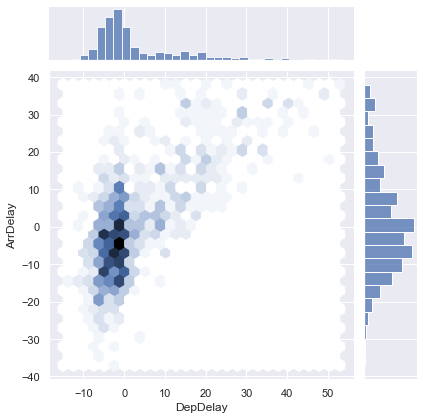

In [5]:
sns.jointplot(x = df3["DepDelay"],y = df3["ArrDelay"], kind="hex")

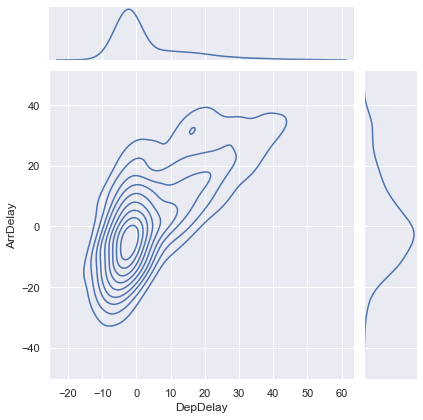

In [6]:
sns.jointplot(x = df3["DepDelay"],y = df3["ArrDelay"], kind="kde")

In [7]:
#mapas de calor o heatmap
gb_df = pd.DataFrame(df2.groupby(["Origin", "Month"], as_index=False)["DepDelay"].mean())
gb_df.head()

,Origin,Month,DepDelay
0,ATL,1,14.539683
1,ATL,2,14.161290
2,ATL,3,19.083333
3,ATL,4,8.084746
4,ATL,5,8.176471


In [8]:
data = gb_df.pivot("Month", "Origin","DepDelay")
data

Origin,ATL,HOU,IND
Month,,,
1,14.539683,2.909091,-2.833333
2,14.161290,11.444444,0.400000
3,19.083333,8.428571,0.571429
4,8.084746,20.500000,3.000000
5,8.176471,-0.571429,0.571429
6,10.102941,13.700000,36.250000
7,21.058824,1.615385,-1.000000
8,15.875000,18.833333,-4.750000
9,7.793651,20.272727,-5.375000


<AxesSubplot:xlabel='Origin', ylabel='Month'>

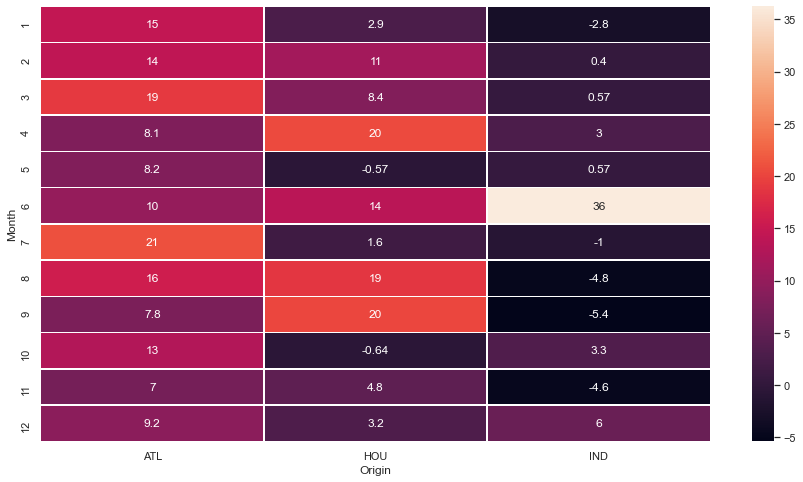

In [9]:
sns.set(rc={'figure.figsize':(15,8)})
sns.heatmap(data = data, annot=True, linewidths=.5)
#este grafico es muy interesante porque te muestra a la ves dos variabels con un valor, 
#que ademas es un descriptivo del cruce de dos variables, y te muestra una escala de valores,
#que te permite ver en que mes y en aeropuerto los retrasos son mas elevados,
#por ejemplo: en Junio, en houston tenemos unos retrasos muy elevados,
#tambien en agosto, auque el mayor se encuentra en junio en indiana.
#solo hay una lectura de color y vertical.